In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('rwsi_data.csv')

In [5]:
df.head()

,ggSessionID,AdClicks,InfoSectionCount,InfoSectionTime,HelpPageVisits,HelpPageTime,ItemBrowseCount,ItemBrowseTime,ExitRateFirstPage,SessionExitRatio,PageEngagementScore,HolidayProximityIndex,VisitMonth,UserPlatformID,WebClientCode,MarketZone,TrafficSourceCode,UserCategory,IsWeekendVisit,MonetaryConversion
0,jv3uDyqYltpoXreO,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,February,Windows,Safari,North America,1.0,Returning,False,No
1,eBHG5YGyco8TRlac,4.0,0.0,0.0,0.0,0.0,2.0,64.000000,0.00,0.10,0.0,0.0,February,Android,Chrome,NaN,2.0,Returning,False,No
2,Lz5fuqr91SKGHb5N,0.0,0.0,0.0,0.0,0.0,1.0,0.000000,0.20,0.20,0.0,0.0,February,MacOS,Safari,Other,3.0,Returning,False,No
3,cyOsumxkpNEvKIdc,4.0,0.0,0.0,0.0,0.0,2.0,2.666667,0.05,0.14,0.0,0.0,February,iOS,NaN,Europe,4.0,Returning,False,No
4,F4rTMKOqtoPKzxw9,2.0,0.0,0.0,0.0,0.0,10.0,627.500000,0.02,0.05,0.0,NaN,February,iOS,Internet Explorer,NaN,4.0,Returning,True,No


In [6]:
df.shape

(12330, 20)

In [7]:
df.describe()

,AdClicks,InfoSectionCount,InfoSectionTime,HelpPageVisits,HelpPageTime,ItemBrowseCount,ItemBrowseTime,ExitRateFirstPage,SessionExitRatio,PageEngagementScore,HolidayProximityIndex,TrafficSourceCode
count,11467.000000,11961.000000,11961.000000,12084.000000,12084.000000,11837.000000,11837.000000,12207.000000,12084.000000,11961.000000,11837.000000,11714.000000
mean,1.993459,2.318201,80.871460,0.502565,34.420615,31.717749,1196.681677,0.022234,0.043130,5.885423,0.061806,4.069489
std,1.420444,3.326956,177.208946,1.271441,141.209531,44.390208,1918.148954,0.048551,0.048623,18.557293,0.199556,4.031417
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,185.000000,0.000000,0.014286,0.000000,0.000000,2.000000
50%,2.000000,1.000000,8.000000,0.000000,0.000000,18.000000,598.250000,0.003125,0.025222,0.000000,0.000000,2.000000
75%,3.000000,4.000000,92.933333,0.000000,0.000000,38.000000,1469.666667,0.016923,0.050000,0.000000,0.000000,4.000000
max,4.000000,27.000000,3398.750000,24.000000,2549.375000,705.000000,63973.522230,0.200000,0.200000,361.763742,1.000000,20.000000



Percentages:
 MonetaryConversion
No     84.53%
Yes    15.47%
Name: count, dtype: object


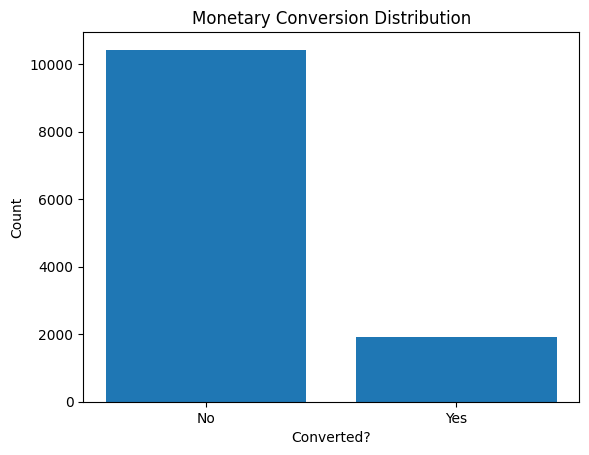

In [8]:
# Conversion Rate Distribution
conversion_count = df['MonetaryConversion'].value_counts()

plt.bar(conversion_count.index, conversion_count.values)
plt.title('Monetary Conversion Distribution')
plt.xlabel('Converted?')
plt.ylabel('Count')
percentages = (conversion_count / len(df)) * 100
print("\nPercentages:\n", percentages.round(2).astype(str) + '%')
plt.show()


- Dataset is imbalanced and needs to be balanced using Smote for balancing.

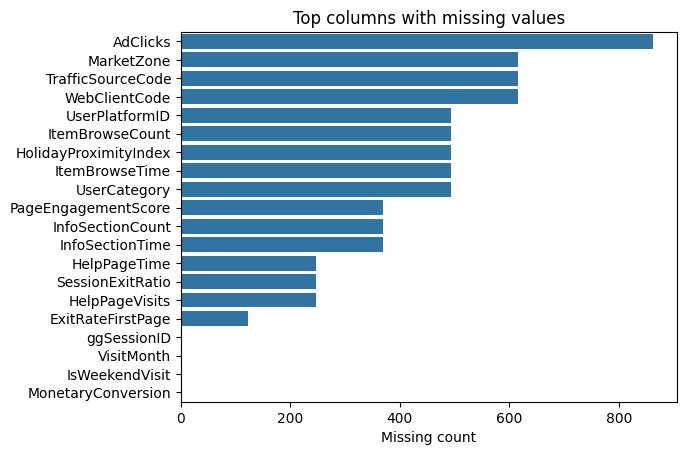

In [9]:
# Missing values in dataset
miss = df.isnull().sum().sort_values(ascending=False).head(20)
sns.barplot(x=miss.values, y=miss.index)
plt.title('Top columns with missing values')
plt.xlabel('Missing count'); plt.ylabel('')
plt.show()

Graph shows that these are having missing or null values in it.

AdClicks
0.0    2344
3.0    2313
4.0    2291
1.0    2282
2.0    2237
Name: count, dtype: int64
Total number of values in AdClicks = 11467
Missing values = 863


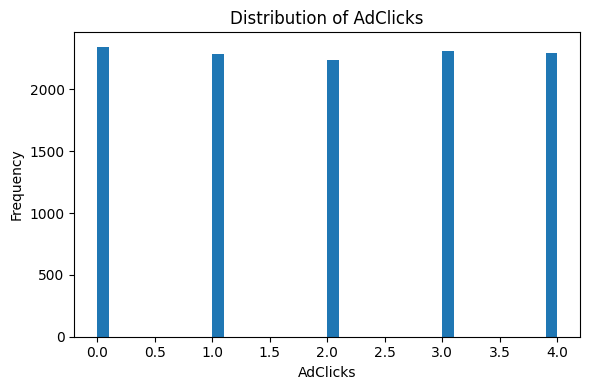

ItemBrowseTime
0.000000       722
17.000000       20
8.000000        17
11.000000       17
22.000000       15
              ... 
170.750000       1
1697.058333      1
1860.250000      1
1265.892857      1
374.000000       1
Name: count, Length: 9199, dtype: int64
Total number of values in ItemBrowseTime = 11837
Missing values = 493


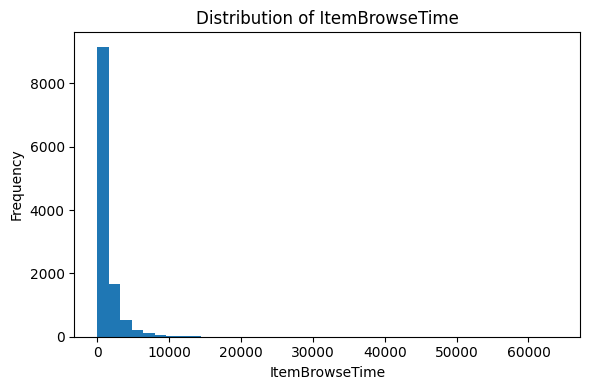

ItemBrowseCount
1.0      595
2.0      446
3.0      436
4.0      387
6.0      383
        ... 
340.0      1
251.0      1
517.0      1
210.0      1
192.0      1
Name: count, Length: 306, dtype: int64
Total number of values in ItemBrowseCount = 11837
Missing values = 493


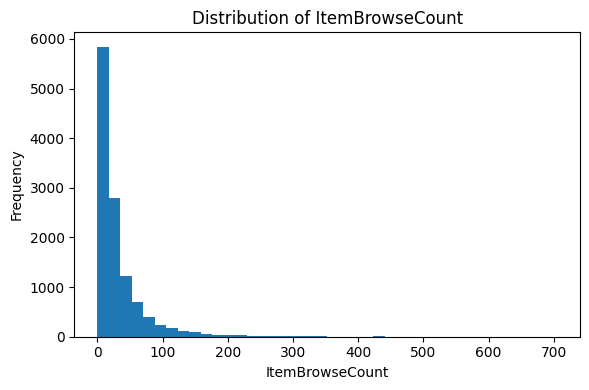

PageEngagementScore
0.000000      9317
53.988000        6
42.293068        3
54.980000        2
6.221045         2
              ... 
22.032769        1
4.368516         1
8.772473         1
51.463311        1
109.176000       1
Name: count, Length: 2618, dtype: int64
Total number of values in PageEngagementScore = 11961
Missing values = 369


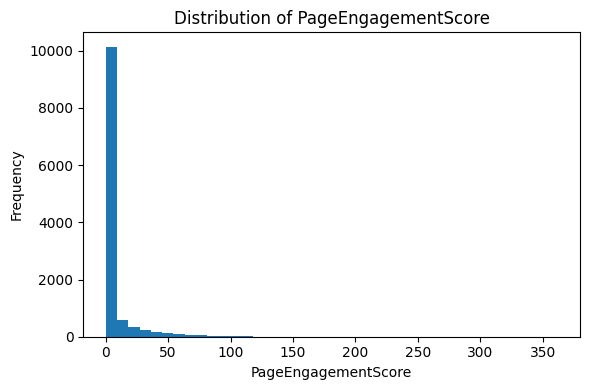

SessionExitRatio
0.200000    695
0.100000    333
0.050000    322
0.033333    286
0.066667    260
           ... 
0.016206      1
0.022323      1
0.010782      1
0.018971      1
0.019213      1
Name: count, Length: 4695, dtype: int64
Total number of values in SessionExitRatio = 12084
Missing values = 246


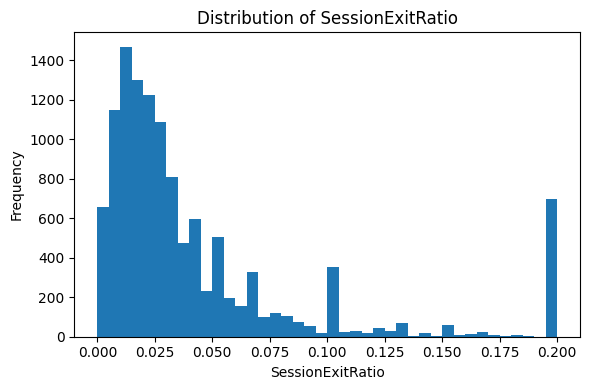

In [10]:
# Time spent
columns = ['AdClicks','ItemBrowseTime','ItemBrowseCount','PageEngagementScore','SessionExitRatio']
for col in columns:
    if col in df.columns:
        vals = df[col].dropna()
        plt.figure(figsize=(6,4))
        plt.hist(vals, bins=40)
        plt.title(f'Distribution of {col}')
        print(df[col].value_counts().sort_values(ascending=False))
        print(f'Total number of values in {col} = {df[col].count()}')
        print(f'Missing values = {df.shape[0] - df[col].count()}')
        plt.xlabel(col); plt.ylabel('Frequency')
        plt.tight_layout()
        plt.show()


In [11]:
df['MonetaryConversion'] = df['MonetaryConversion'].map({'Yes': 1, 'No': 0})

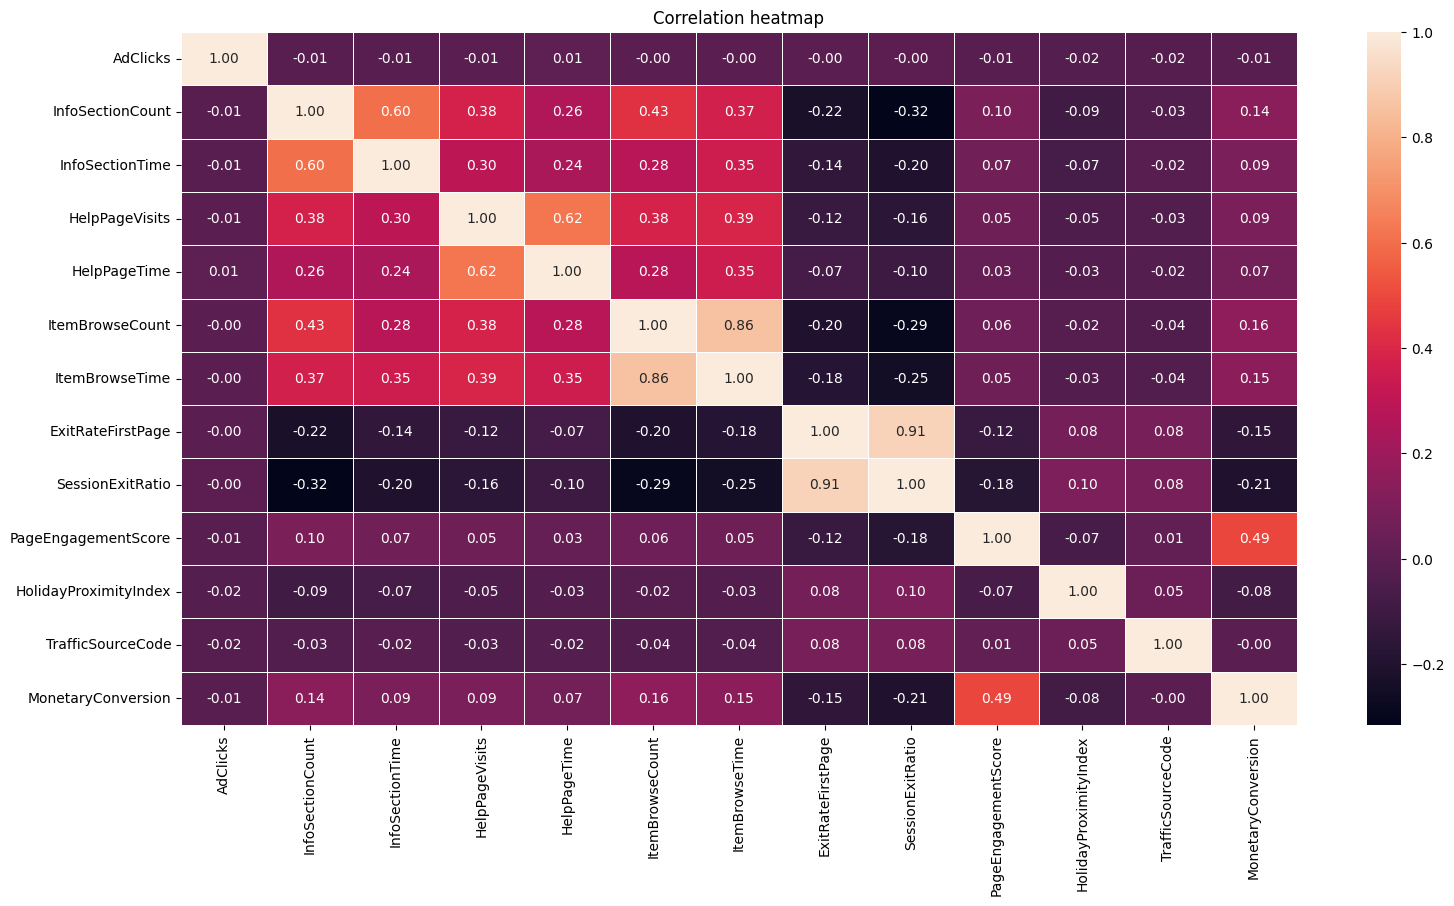

In [12]:
num = df.select_dtypes(include=[np.number])
plt.figure(figsize=(18,9))
sns.heatmap(num.corr(), annot=True, fmt='.2f', linewidths=.5, cbar=True)
plt.title('Correlation heatmap')
plt.show()

- Two columns which are highly correlated are PageEngagementScore.
- Two columns which are very less correlated are HolidayProximityIndex
